In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train[0]

5

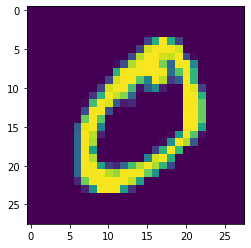

In [12]:
plt.imshow(X_train[1])

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [14]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [15]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])


In [18]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))


Epoch 1/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2652 - accuracy: 0.9484 - val_loss: 0.0942 - val_accuracy: 0.9706
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0765 - accuracy: 0.9763 - val_loss: 0.0829 - val_accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.1027 - val_accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0870 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0913 - val_accuracy: 0.9777


In [19]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09134158492088318, 0.9776999950408936]


In [20]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 184ms/step
[[1.0216079e-11 5.6882886e-18 3.4660043e-14 8.9911224e-11 4.3160506e-16
  2.8514312e-15 8.6057203e-16 1.0000000e+00 6.8767843e-13 2.8195893e-10]
 [9.7042864e-08 5.1753674e-10 9.9976748e-01 6.7548770e-12 1.7177870e-11
  3.4989250e-17 2.3238749e-04 2.4993126e-15 3.2498414e-11 1.9911582e-16]
 [4.7810282e-08 9.9997008e-01 5.1138754e-06 8.3738461e-11 1.8835668e-05
  4.6232540e-06 5.2481486e-08 1.9138362e-07 9.6832639e-07 7.2180628e-10]
 [9.9999964e-01 1.3053341e-17 4.0765646e-10 7.0925809e-14 5.5234270e-09
  4.1928888e-10 2.3675007e-08 4.6287827e-13 2.1512368e-10 3.3524645e-07]]


In [21]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])


[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
model.save("model.h5")

In [23]:
model=load_model("model.h5")